<a href="https://colab.research.google.com/github/Awangnugrawan/Predictive-Analysis-and-Review/blob/main/PREDICTIVE_ANALYSIS_(Flight_prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SUBMISSION PROJECT DICODING Proyek Pertama : Predictive Analytics
## DATA DIRI

*  Nama= Awang Mulya Nugrawan
*  username DICODING= awang_nugrawan
*  email = awangmulyanugrawan@gmail.com
*  No.hp = 082191862002
*  Asal= Makassar, Sulawesi Selatan
*  Status = Mahasiswa Sisfor Universitas Hasanuddin











#LIBRARY

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

#Explorasi data analysis

Dataset yang digunakan pada laporan ini adalah data tarif penerbangan di negara India pada tahun 2019 .Tujuan atau target dari dataset ini adalah menganalisis data  dan membangun model prediksi yang dapat memprediksi harga tiket pesawat berdasarkan fitur-fitur tersebut. [Kaggle Repository] (https://www.kaggle.com/datasets/nikhilmittal/flight-fare-prediction-mh/code)

In [ ]:
df= pd.read_excel('/content/drive/MyDrive/Machine Learning Terapan/flight.xlsx')

In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


Variabel-variabel pada flight fare prediction Kaggle Dataset adalah sebagai berikut:
1. Airline: kolom ini akan berisi semua jenis maskapai penerbangan seperti Indigo, Jet Airways, Air India, dan masih banyak lagi. 
2. Date_of_Journey: Kolom ini tentang tanggal di mana perjalanan penumpang akan dimulai. 
3. Source: Kolom ini berisi nama tempat dari mana perjalanan penumpang akan dimulai. 
4. Destination: Kolom ini menampung nama tempat tujuan perjalanan penumpang. 
5. Route: Kolom ini tentang rute apa yang dipilih penumpang untuk melakukan perjalanan dari tempat asal ke tempat tujuan. 
6. Dep_time : merujuk pada waktu keberangkatan (departure time) suatu penerbangan,
7. Arrival_Time: Waktu kedatangan adalah kapan penumpang akan sampai di tempat tujuan. 
8. Duration: Durasi adalah seluruh periode yang dibutuhkan penerbangan untuk menyelesaikan perjalanannya dari sumber ke tujuan. 
9. Total_Stops: Kolom ini tentang berapa banyak tempat penerbangan akan berhenti di sana untuk penerbangan sepanjang perjalanan. 
10. Additional_Info: Pada kolom ini, kita akan mendapatkan informasi tentang makanan, jenis makanan, dan fasilitas lainnya. 
11. Price: Harga penerbangan untuk perjalanan lengkap termasuk semua biaya sebelum naik pesawat.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


#DATA PREPARATION

##Missing value

tahapan yang akan dilakukan pada adalah menghapus nilai null dan menghapus atribut/kolom yang tidak diperlukan

In [ ]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


<Figure size 1800x1200 with 0 Axes>

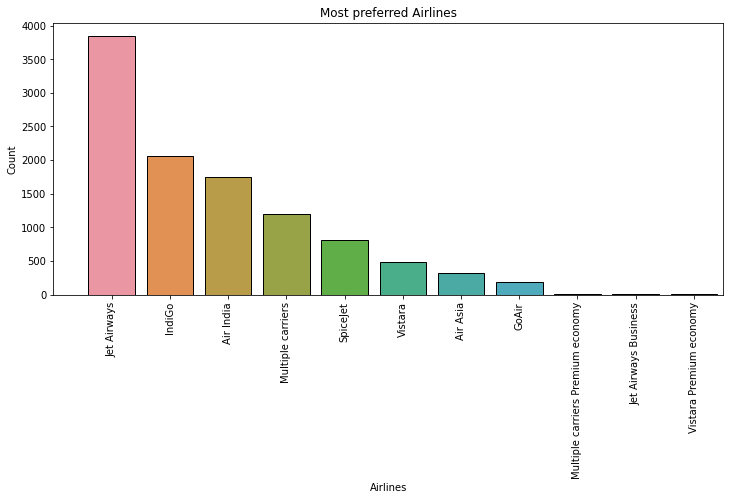

In [ ]:
plt.figure(dpi=300)
plt.figure(figsize=(12,5))
sns.countplot(x="Airline", data=df,order = df['Airline'].value_counts().index,ec = "black")
plt.title("Most preferred Airlines")
plt.ylabel("Count")
plt.xlabel("Airlines")
plt.xticks(rotation= 90)
plt.xlim(-1,10.5)
plt.show()


Dari hasil visualisasipada atribut “Airline” dapat dilihat bahwa jenis maskapai penerbangan  yang paling banyak adalah Jet airways disusul dengan IndiGo kemudian AirIndia sedangkan maskapai penerbangan Visitera premium economy adalah maskapai yang paling sedikit.


In [ ]:
df['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [ ]:
#drop dataset "Route karena valuenya mirip dengan kolom Total Stops" dan "Additional info karena sebagian besar valuenya adalah no info"
df.drop(['Route', 'Additional_Info'], axis=1, inplace=True)

##Handling "Date_of_Journey"

Untuk mempermudah dalam modelling maka kita akan memisahkan nya menjadi tiap kolom menjadi kolom hari “Journey_days” dan kolom bulan “Journey_month” sedangkan untuk tahun tidak perlu karena semua value pada dataset ini sama yaitu tahun 2019. 

In [ ]:
df.head(10)

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,09:00,11:25,2h 25m,non-stop,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,18:55,10:25 13 Mar,15h 30m,1 stop,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,08:00,05:05 02 Mar,21h 5m,1 stop,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,08:55,10:25 13 Mar,25h 30m,1 stop,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,11:25,19:15,7h 50m,1 stop,8625


In [ ]:
df['Journey_days']= pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y').dt.day

In [ ]:
df['Journey_month']=pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y').dt.month
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_days,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,1,3


In [ ]:
df.drop('Date_of_Journey', axis=1, inplace=True)

##Handling "Dep_Time"

Kita akan memisahkan value nya menjadi kolom menit “Dep_minute” dan kolom jam “Dep_Time”. 

In [ ]:
#membuat kolom baru dari dep_time menjadi dengan mengekstrak jam(hour) dan menit (minute) 
df['Dep_hour']= pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_minute']= pd.to_datetime(df['Dep_Time']).dt.minute
df.drop('Dep_Time', axis=1 , inplace=True)


##Handling "Arrival_Time"

Atribut ini tentang waktu keberangkatan juga dapat dipisahkan menjadi waktu keberangkatan dalam menit “Arrival_Minute” dan keberangkatan dalam jam “Arrival_hour”.

In [ ]:
#membuat kolom baru dari Arrival_time menjadi dengan mengekstrak jam(hour) dan menit (minute)
df['Arrival_hour']= pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_minute']= pd.to_datetime(df['Arrival_Time']).dt.minute
df.drop('Arrival_Time', axis=1 , inplace=True)

In [ ]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_days,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,1,3,16,50,21,35


## Handling "Duration"

Sama seperti proses sebelumnya pada kolom ini kita juga akan memisahkan nya menjadi durasi dalam menit “Duration_mins” dan Durasi dalam jam “Duration_hour”. 

In [ ]:
duration = list(df["Duration"])

In [ ]:
print(duration)

['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m', '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m', '12h 10m', '2h 35m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m', '5h 10m', '15h 20m', '2h 50m', '2h 55m', '13h 20m', '15h 10m', '5h 45m', '5h 55m', '2h 50m', '2h 15m', '2h 15m', '13h 25m', '2h 50m', '22h', '5h 30m', '10h 25m', '5h 15m', '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m', '2h 45m', '12h', '2h 50m', '2h 50m', '2h 15m', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '2h 50m', '3h', '2h 50m', '16h 15m', '15h 5m', '2h 15m', '6h 30m', '25h 5m', '12h 25m', '27h 20m', '10h 15m', '10h 30m', '2h 15m', '10h 25m', '2h 50m', '1h 30m', '13h 20m', '2h 15m', '1h 25m', '26h 30m', '7h 20m', '13h 30m', '5h', '2h 45m', '2h 50m', '1h 30m', '19h 5m', '2h 15m', '14h 50m', '2h 40m', '22h 10m', '9h 35m', '10h', '21h 20m', '5h 25m', '18h 45m', '12h 20m', '18h', '9h 15m', '11h 5m', '17h 30m', '13h 20m', '2h 35m', '2h 25m', '2h 40m', '3h', '1h 25m', '16h 35m

In [ ]:
#perulangan untuk menyamaratakan format setelah itu memisahkan menajadi masing2 kolom jam dan menit 
for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Periksa apakah durasi hanya berisi jam atau menit
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Ekstrak jam dari durasi
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Ekstrak hanya menit dari durasi

# menambahkan kolom durasi ke dataframe
df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins
df.drop(["Duration"], axis = 1, inplace = True)


In [ ]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_days,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


## Handling "Total_stops"

Pada atribut ini terdapat 5 value utama yang dapat dilakukan label encoding dengan nilai 0-4

In [ ]:
df["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [ ]:
#label encoding value nya menjadi interval 0-4
df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)


## Handling "Airplane"

Berbeda dengan atribut-atribuk numerik sebelumnya, pada kolom akan dilakukan penyederhanaan atau penggabungan value. Untuk value yang di gabung adalah value yang memiliki jumlah sedikit seperti 'Trujet','Vistara Premium economy','Jet Airways Business','Multiple carriers Premium economy' maka akan di gabung menjadi satu value yaitu “Other”.

In [ ]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

Mengelompokkan jenis pesawat yang memilki jumlah sedikit menjadi satu value yaitu "other"

In [ ]:
Airline = df[['Airline']]
current_list = Airline['Airline']
new_list = []

for carrier in current_list:
  if carrier in ['Trujet','Vistara Premium economy','Jet Airways Business','Multiple carriers Premium economy']:
    new_list.append('Other')
  else:
    new_list.append(carrier)

Airline['Airline'] = pd.DataFrame(new_list)
Airline['Airline'].value_counts()

<ipython-input-88-02a4c499e34a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline'] = pd.DataFrame(new_list)


Jet Airways          3849
IndiGo               2053
Air India            1750
Multiple carriers    1196
SpiceJet              818
Vistara               479
Air Asia              319
GoAir                 194
Other                  23
Name: Airline, dtype: int64

In [ ]:
#OneHotEncoding
Airline= pd.get_dummies(Airline, drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Other,Airline_SpiceJet,Airline_Vistara
0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0


## Handling "Source"

In [ ]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [ ]:
df['Source']

0        Banglore
1         Kolkata
2           Delhi
3         Kolkata
4        Banglore
           ...   
10678     Kolkata
10679     Kolkata
10680    Banglore
10681    Banglore
10682       Delhi
Name: Source, Length: 10682, dtype: object

In [ ]:
#oneHotEncoding
Source= df[['Source']]
Source= pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


## Handling "Destination"

Sama seperti atribut Airline, kita juga dapat melakukan penyederhanaan / penggabungan value yang memilki makna yang sama yaitu “New Delhi” dan “Delhi” sehingga dapat di satukan menjadi “Delhi”. 

In [ ]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [ ]:
#value "new delhi" dan "Delhi" dapat disatukan menjadi satu value "Delhi" 
Destination = df[['Destination']]
current_destination = Destination['Destination']
new_destination = [ ]

for carrier in current_destination:
  if carrier in ['New Delhi']:
    new_destination.append('Delhi')
  else :
    new_destination.append(carrier)

Destination['Destination'] =  pd.DataFrame(new_destination)

#oneHotEncoding
Destination= pd.get_dummies(Destination, drop_first= True)
Destination.head()


<ipython-input-94-9d6110a0f869>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Destination['Destination'] =  pd.DataFrame(new_destination)


,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,1,0,0
1,0,0,0,0
2,1,0,0,0
3,0,0,0,0
4,0,1,0,0


##Concenate dataframe Airline,Source, dan Destination

Penyatuan 3 atribut catagorik yang telah dilakukan teknik One hot encoding pada tiap variabelnya ke dataframe utama “df”

In [ ]:
# Concatenate dataframe --> df + Airline + Source + Destination 
df_train = pd.concat([df, Airline, Source, Destination], axis = 1)
df_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [ ]:
df_train.head()

,Total_Stops,Price,Journey_days,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins,...,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,1,0,0
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,0,1,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,0,1,0,0,1,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,0,1,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df_train.shape

(10682, 26)

#Split data

In [ ]:
X= df_train.drop(['Price'],axis=1)  #feature
y=df_train['Price'] #target

print(X.shape, y.shape)

(10682, 25) (10682,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Model Deployment

In [ ]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_R2_Score', 'train_Mae'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])

**KNeighborsRegressor**

Pada dataset nilai K terbaik setelah pengujian beberapa nilai K didapatkan nilai K terbaik adalah 3 .Namun algoritma ini bukan hasil yang terbaik pada ketiga modelling. Selain itu , ini juga merupakan kekurangan karena nilai K yang sulit ditemukan

In [ ]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
 
models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)
models.loc['train_R2_Score','knn'] = r2_score(y_pred = knn.predict(X_train), y_true=y_train)
models.loc['train_mae','knn'] = mean_absolute_error(y_pred = knn.predict(X_train), y_true=y_train)

**RandomForestRegressor**

Pada modelling menggunakan n_estimators=50, max_depth=16, random_state=55, n_jobs=-1 dengan parameter tersebut memberikan hasil algoritma paling baik diantara algoritma lainnya

In [ ]:

RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train) 
models.loc['train_R2_Score','RandomForest'] = r2_score(y_pred=RF.predict(X_train), y_true=y_train) 
models.loc['train_mae','RandomForest'] = mean_absolute_error(y_pred = RF.predict(X_train), y_true=y_train)

**DecisionTreeRegressor**

Pada modelling ini menggunakan parameter max_depth=20 , namun setelah di evaluasi terjadi overfitting sesuai dengan kekurangan yang dijelaskan di atas. Sehingga Algoritma ini tidak lebih baik daripada Random Forest Regressor tapi sedikit lebih baik dari Algoritma KNeighborsRegressor

In [ ]:
DTR= DecisionTreeRegressor(max_depth=20, random_state=3)
DTR.fit(X_train, y_train)

models.loc['train_mse','DTR'] = mean_squared_error(y_pred=DTR.predict(X_train), y_true=y_train)
models.loc['train_R2_Score','DTR'] = r2_score(y_pred=DTR.predict(X_train), y_true=y_train)
models.loc['train_mae','DTR'] = mean_absolute_error(y_pred = DTR.predict(X_train), y_true=y_train)

#EVALUASI MODEL

**R2_Score**

R2 Score adalah metrik yang digunakan untuk mengukur seberapa baik model regresi memprediksi target. Formula R2 Score adalah:
R2 = 1 - (SSres / SStot)


Ket: \
*  SSres adalah sum of squared residuals, yaitu jumlah kuadrat selisih antara nilai target aktual dan nilai target prediksi. \
* SStot adalah total sum of squares, yaitu jumlah kuadrat selisih antara nilai target aktual dan nilai rata-rata target.







In [ ]:
# Buat variabel R2_Score yang isinya adalah dataframe nilai R2_Score data train dan test pada masing-masing algoritma
R2_Score = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','DTR'])
 
# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF,'DTR':DTR}
 
# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    R2_Score.loc[name, 'train'] = r2_score(y_true=y_train, y_pred=model.predict(X_train))
    R2_Score.loc[name, 'test'] = r2_score(y_true=y_test, y_pred=model.predict(X_test))
 
# Panggil R2_Score
R2_Score

,train,test
KNN,0.798497,0.624805
RF,0.941121,0.825389
DTR,0.972591,0.737278


Metrik ini mengukur seberapa baik model regresi menjelaskan variasi dari target (tarif pesawat). Nilai R2_Score berkisar antara 0 dan 1, dimana nilai 1 menunjukkan model regresi yang sempurna dan nilai 0 menunjukkan model regresi yang buruk. Dalam hal prediksi tarif pesawat, nilai R2_Score yang tinggi menunjukkan bahwa model regresi memiliki kemampuan yang baik dalam memprediksi tarif pesawat.


Text(0.5, 1.0, 'PLOT R2_SCORE')

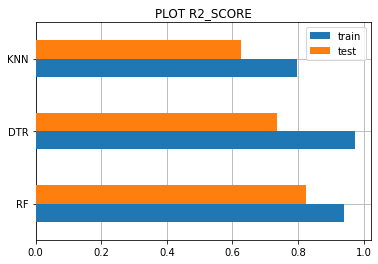

In [ ]:
fig, ax = plt.subplots()
R2_Score.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)
ax.set_title("PLOT R2_SCORE")

**Mean Squared Error (MSE)**

Mean Squared Error (MSE) adalah metrik yang digunakan untuk mengukur kualitas model regresi. Formula MSE adalah:
MSE = (1 / n) * Σ (yi - ŷi)^2


ket:


* n adalah jumlah data 
*  yi adalah nilai target aktual
*  ŷi adalah nilai target prediksi
* Σ (yi - ŷi)^2 adalah jumlah kuadrat selisih antara nilai target aktual dan nilai target prediksi








In [ ]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','DTR'])
 
# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'DTR':DTR}
 
# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
 
# Panggil mse
mse

,train,test
KNN,4186.297999,8712.025152
RF,1223.235661,4054.469
DTR,569.42498,6100.403468


Metrik ini mengukur rata-rata kuadrat selisih antara nilai target aktual (tarif pesawat) dan nilai target prediksi. Semakin kecil nilai MSE, semakin baik model regresi dalam memprediksi tarif pesawat. Dalam hal prediksi tarif pesawat, model regresi dengan MSE yang lebih kecil akan dianggap memiliki performa yang lebih baik dibandingkan dengan model yang memiliki MSE yang lebih besar.

Text(0.5, 1.0, 'PLOT MSE')

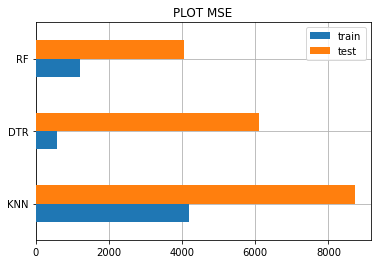

In [ ]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)
ax.set_title("PLOT MSE")

**Mean Absolute Error** \
Mean Absolute Error (MAE) adalah metrik yang digunakan untuk mengukur kualitas model regresi. Formula MAE adalah:

MAE = (1 / n) * Σ |yi - ŷi|



ket:


* n adalah jumlah data 
*  yi adalah nilai target aktual
*  ŷi adalah nilai target prediksi
* Σ |yi - ŷi| adalah jumlah absolute selisih antara nilai target aktual dan nilai target prediksi








In [ ]:
# Buat variabel mae yang isinya adalah dataframe nilai mae data train dan test pada masing-masing algoritma
mae = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','DTR'])
 
# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'DTR':DTR}
 
# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mae.loc[name, 'train'] = mean_absolute_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mae.loc[name, 'test'] = mean_absolute_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
 
# Panggil mae
mae

,train,test
KNN,1.24639,1.799676
RF,0.690195,1.236153
DTR,0.296922,1.440906


Metrik ini mengukur rata-rata selisih antara nilai target aktual (tarif pesawat) dan nilai target prediksi. Semakin kecil nilai MAE, semakin baik model regresi dalam memprediksi tarif pesawat. Dalam hal prediksi tarif pesawat, model regresi dengan MAE yang lebih kecil akan dianggap memiliki performa yang lebih baik dibandingkan dengan model yang memiliki MAE yang lebih besar.

Text(0.5, 1.0, 'PLOT MAE')

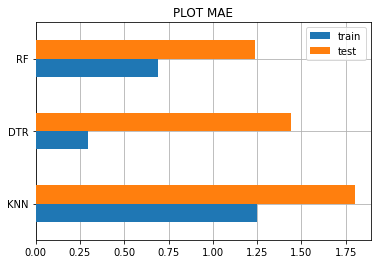

In [ ]:
fig, ax = plt.subplots()
mae.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)
ax.set_title("PLOT MAE")

In [ ]:
#menguji
prediksi = X_test.iloc[:5].copy()
pred_dict = {'y_true':y_test[:5]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_DTR
7606,7870,9147.0,9120.8,10188.0
15,14011,12278.3,13519.8,14221.0
145,10844,10844.0,11383.6,10809.7
3828,4077,4423.0,4302.2,3943.0
6168,5298,5932.0,5775.2,5298.0
